In [13]:
import numpy as np

from sklearn import datasets, linear_model, svm
import matplotlib.pyplot as plt
import style_figs

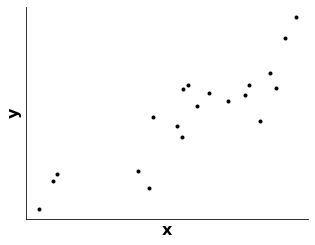

In [25]:

# data generation
np.random.seed(0)
n_sample = 20
x = np.random.rand(n_sample)
noise = np.random.randn(n_sample) * .3
y = 2*x + noise

# fig: linear_data
plt.figure(figsize = (4,3))
plt.scatter(x,y,  color='k', s=9)

plt.axis('tight')
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.savefig('linear_data.svg', facecolor='none', edgecolor='none')

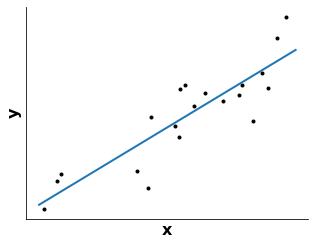

In [26]:
# fit linear regression

lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1,1),y)
grid = np.linspace(0,1, 300)
y_hat = lr.predict(grid.reshape(-1, 1))

# fig: linear_fit

plt.figure(figsize = (4,3))
# plt.axis('tight')
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.scatter(x,y,  color='k', s=9)
plt.plot(grid, y_hat, linewidth=2)
plt.savefig('../figures/linear_fit.svg', facecolor='none', edgecolor='none')